In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<AxesSubplot:>

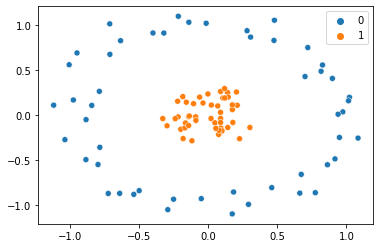

In [2]:
# Generate data
x,y=make_circles(n_samples=100,noise=0.1,factor=0.2,random_state=20)
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [3]:
# Add bias
x=pd.DataFrame(x)
x[2]=1

In [4]:
# Function to generate polynomial features
def polynomial_features(x,degree):
    x_poly=pd.DataFrame()
    for i in range(len(x.columns)):
        for j in x.columns:
            x_poly[str(i)+'*'+str(j)]=x[i]*x[j]        
    return x_poly

In [5]:
x.head()

,0,1,2
0,-0.183255,0.203277,1
1,-0.090094,-0.021479,1
2,1.022440,0.195942,1
3,0.775336,-0.864365,1
4,0.204972,0.254317,1


In [6]:
# Perceptron algorithm
def perceptron(x,y):
    x=polynomial_features(x,degree=2)
    m=len(x)
    n=len(x.columns)
    j=m
    k=100
    w=np.random.rand(n)
    # Loop until convergence or max iterations k
    while(k!=0 and j!=0):
        k-=1
        j=0
        for i in range(m):
            dw=0
            if((w.T@x.iloc[i,:])<0 and y[i]==1):
                dw=x.iloc[i,:]
                j+=1
            elif((w.T@x.iloc[i,:])>=0 and y[i]==0):
                dw=-x.iloc[i,:]
                j+=1
            w=w+dw
    return w

In [7]:
w=perceptron(x,y)
# Final weights
w

0*0   -3.341864
0*1   -0.226155
0*2   -0.235612
1*0    0.428767
1*1   -2.407897
1*2    0.506552
2*0    0.339470
2*1   -0.300715
2*2    0.677930
dtype: float64

In [8]:
# Prediction function
def h(z):
    if z>=0:
        return 1
    else:
        return 0

In [9]:
# predict function for array
def h_array(z):
    z[z>=0]=1
    z[z<0]=0
    return z

In [10]:
# Predicting the class for given x
def func(x0,x1,w):
    c=w[0]*(x0**2)+(w[1]+w[3])*x0*x1+(w[2]+w[6])*x0+w[4]*(x1**2)+(w[5]+w[7])*x1+w[8]
    z=h_array(c)
    return c

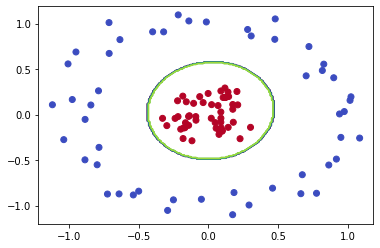

In [11]:
#plotting the decision boundary
x_min, x_max = min(x[0])-0.1 , max(x[0]) +0.1
y_min, y_max = min(x[1]) -0.1, max(x[1]) +0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = func(xx.ravel(), yy.ravel(),w) 
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.scatter(x[0],x[1],c=y,cmap='coolwarm')
plt.show()